<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
    h1 {
        line-height: 200%;
        font-family: 'Comic Sans MS', cursive, sans-serif;
        color: #ffb6c1; /* رنگ نارنجی پاستیلی */
    }
</style>
</head>
<body>
    <h1>Zahra Alinaghipour</h1>
</body>
</html>


Train a model to predict whether a trip is canceled or not. This means we aim to predict whether users will cancel their tickets or not.

In [13]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 

from sklearn.preprocessing import LabelEncoder

|Column|Description|
|:------:|:---:|
|Created|Time of ticket registration|
|CancelTime|Time when the passenger canceled the ticket|
|DepartureTime|Time of departure|
|BillID|Purchase ID|
|TicketID|Ticket ID|
|ReserveStatus|Number of passing vehicles|
|UserID|User ID|
|Male|Whether the ticket belongs to a female or male|
|Price|Ticket price without discount|
|CouponDiscount|Discount applied to the ticket by the person|
|From|Travel origin|
|To|Travel destination|
|Domestic|Whether the travel is domestic or international|
|VehicleType|Specifies details of the vehicle|
|VehicleClass|Whether the vehicle is first class or not|
|Vehicle|Type of vehicle|
|HashPassportNumber_p|Hashed passport number|
|HashEmail|Hashed email|
|BuyerMobile|Hashed mobile number|
|NationalCode|Hashed national code|
|TripReason|Reason for the trip|
|Cancel|Whether the ticket is canceled or not|

In [14]:
train_data = pd.read_csv('../data/train_data.csv')
train_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-26 13:33:20.457,NaN,2022-07-26 16:30:00,38428546,7445571.0,3,NaN,True,1180000.0,0.0,...,1,VIPمانیتوردار-شارژراختصاصی تخت شو مارال (جدید)...,True,Work,Bus,0,NaN,NaN,302222356019,330024570
1,2022-10-27 23:07:01.837,2022-10-27 23:26:39.070,2022-10-29 09:45:00,39768762,7762719.0,5,NaN,False,1050000.0,0.0,...,1,classicus 2+2,True,Int,Bus,1,NaN,NaN,900764168521,995520696
2,2022-09-12 11:01:13.607,NaN,2022-10-03 18:35:00,39128001,2327596.0,5,800398.0,False,4674000.0,0.0,...,1,فوکر 100,False,Int,Plane,0,NaN,1c44d7a76b52341fa12dcfa993138576befcc9ebf01d14...,749804783291,979382950
3,2022-08-08 17:43:35.840,NaN,2022-08-08 22:30:00,38606546,7495440.0,3,NaN,True,1200000.0,0.0,...,1,VIPدرسا+مانیتوردار+شارژراختصاصی+پذیرایی,True,Work,Bus,0,NaN,NaN,781396205677,911237229
4,2022-11-01 15:12:56.823,NaN,2022-11-03 11:30:00,39822185,2356902.0,5,NaN,True,6222000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,bb38b345aec02255e31d178492907175c5984f2a1f5b59...,524576220177,727496008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-10-27 21:41:35.803,NaN,2022-11-05 20:15:00,39767774,3082282.0,2,NaN,False,7200000.0,0.0,...,1,5ستاره بيزينس سلامت فدك,NaN,Int,Train,0,NaN,NaN,395081863564,789320493
101013,2022-09-24 15:51:11.993,NaN,2022-10-21 09:15:00,39319207,3026516.0,2,151423.0,False,4292000.0,0.0,...,1,4ستاره4تخته سپهر,NaN,Int,Train,0,NaN,3f28ed65a16d629747e4d27fab100b2b082fcbdf7ec831...,130026405332,866503410
101014,2022-08-12 13:46:20.480,NaN,2022-08-12 23:59:00,38653461,7508988.0,3,NaN,True,1320000.0,0.0,...,1,VIP 2+1 / مانیتوردار / سیستم تهویه مطبوع / تخ...,True,Int,Bus,0,NaN,NaN,784949357488,881677039
101015,2022-06-20 15:15:37.780,NaN,2022-06-25 10:10:00,37880627,1057205.0,5,641744.0,True,13000000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,750690ca99468f159eff6ad928cec4339b089af8c2e6dc...,766602541733,403505466


In [15]:
test_data = pd.read_csv('../data/test_data.csv')
test_data

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-08 12:04:46.290,2022-08-16 23:59:00,38166794,2890395.0,2,NaN,False,2043000.0,0.0,مشهد,تهران,1,3 ستاره 6 تخته پارسي,NaN,Int,Train,NaN,NaN,419509763088,660703096
1,2022-09-30 14:18:23.487,2022-09-30 23:59:00,39424175,7669420.0,3,NaN,False,1220000.0,0.0,تهران,اصفهان,1,V I P,True,Int,Bus,NaN,NaN,935955347521,960594437
2,2022-05-15 10:52:01.293,2022-06-06 17:40:00,37336619,2783057.0,2,800538.0,True,2132000.0,0.0,مشهد,تهران,1,4ستاره 4تخته سبز نوين,NaN,Int,Train,NaN,NaN,428059757595,854730165
3,2022-10-06 02:55:53.723,2022-10-14 19:45:00,39507715,7691289.0,5,950983.0,False,520000.0,0.0,تهران,سمنان,1,اسکانیا,True,Work,Bus,NaN,012dca1b2070c32e03238f49aa8f12a1a9ce580f8b1368...,515601565031,850531769
4,2022-03-12 13:46:40.300,2022-03-12 19:30:00,36422079,6901256.0,3,NaN,True,1180000.0,0.0,ارومیه,کرمانشاه,1,اسکانیا تک صندلی,True,Work,Bus,NaN,NaN,633910237635,893186872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43288,2022-09-25 15:33:09.793,2022-09-25 20:30:00,39338188,7647177.0,3,NaN,True,2480000.0,0.0,تهران,مشهد (خراسان ),1,وای پی تخت شو ۲۵نفره,True,Int,Bus,NaN,7091c8c24f3f57b98561de5d9a874cb91c3fd44371930a...,45595252975,158174797
43289,2022-07-16 19:58:15.300,2022-07-18 21:45:00,38298325,7406150.0,3,NaN,True,1330000.0,0.0,اصفهان,شیراز,1,اسکانیا درسا(مانیتور اختصاصی),True,Work,Bus,NaN,NaN,194871920550,384954737
43290,2022-06-16 18:14:40.673,2022-06-17 17:30:00,37823306,7274287.0,3,NaN,True,1290000.0,0.0,تهران,رودسر,1,مارال 25 نفره VIP,True,Int,Bus,NaN,NaN,687841588584,648554818
43291,2022-07-23 13:48:45.330,2022-08-23 21:05:00,38386540,2914007.0,2,724274.0,True,2810500.0,0.0,مشهد,تهران,1,4 ستاره 4 تخته غزال,NaN,Int,Train,NaN,a78e5ce63b34517a2c4e1d3ccd474241abe1993b49905c...,976918931561,779144272


In [16]:

import jdatetime

class Preprocessor  : 
    
    def __init__ (self) : 
    
        self.selected_cols = ['Created', 'DepartureTime', 'BillID', 'TicketID', 'ReserveStatus', \
                'Male', 'Price', 'CouponDiscount', 'From', 'To', 'Domestic',\
                'VehicleClass', 'Vehicle', 'Cancel', 'BuyerMobile', 'TripReason']
        
        self.final_features = ['ReserveStatus',
       'Male', 'Domestic', 'Vehicle', 'Cancel', 'TripReason',
       'TimeDiff', 'TicketPerOrder', 'is_with_familiy', 'net_price',
       'From_encoded', 'To_encoded', 'has_discount']
    
        self.target_col = 'Cancel'


    def to_jalali (self, gregorian_date) : 
        return jdatetime.datetime.fromgregorian(datetime = gregorian_date) 
    
    
    def is_family (self, rows) : 
        return True in rows.values and False in rows.values    

    def select_useful_cols (self, is_train) : 
        if is_train : 
            self.df = self.dataset[self.selected_cols]
        else : 
            test_useful_cols = self.selected_cols.copy()
            test_useful_cols.remove(self.target_col)
            self.df = self.dataset[test_useful_cols]
                        
        
         
    def handle_datetime_cols (self) : 
        self.df[['Created', 'DepartureTime']] = self.df[['Created', 'DepartureTime']].apply(pd.to_datetime)        
        self.df['TimeDiff'] = (self.df['DepartureTime'] - self.df['Created']).dt.days
        self.df.drop(['Created', 'DepartureTime'], axis=1, inplace=True)
            
        
    def extract_ticket_per_order (self) : 
        self.df['TicketPerOrder'] = self.df.groupby('BillID').TicketID.transform('count')
        
    def extract_is_with_family (self) : 
        self.df['is_with_familiy'] = self.df.groupby('BillID').Male.transform(self.is_family)
    
    
    def handle_monetary (self) : 
        self.df['net_price'] = self.df.Price - self.df.CouponDiscount
        self.df['net_price'] /= self.df['net_price'].max()
        self.df['has_discount'] = self.df.CouponDiscount > 0
        
        
    def encode_cities (self, is_train) : 
        if is_train : 
            cities = self.df.From.append(self.df.To).values 
            self.city_encoder = LabelEncoder().fit(cities)
        try : 
            city2idx = dict(zip(self.city_encoder.classes_, self.city_encoder.transform(self.city_encoder.classes_)))
            
            self.df['From_encoded'] = self.df.From.map(city2idx).fillna(-1).astype(int)
            self.df['To_encoded'] = self.df.To.map(city2idx).fillna(-1).astype(int)
            
            self.df.drop(['To', 'From'], axis=1, inplace=True)
        
        except KeyError as exc:  
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')
            
            
    def encode_categorical_cols (self, is_train) : 
        if is_train : 
            self.cat_cols = self.df.select_dtypes(exclude=['int','float']).columns
            self.cat_les = {}

            for col in self.cat_cols : 
                le = LabelEncoder().fit(self.df[col])
                self.cat_les.update({col:le})
        
        try : 
            for col in self.cat_cols :
                if col == self.target_col :
                    continue
                self.df[col] = self.cat_les[col].transform(self.df[col])
        except Exception as exc: 
            raise Exception('Something went wrong. Maybe this class is used for test date before fit on train data!')

            
    def select_final_features (self, is_train) : 
        if is_train : 
            self.df = self.df[self.final_features]
        else : 
            test_final_cols = self.final_features.copy()
            test_final_cols.remove(self.target_col)
            self.df = self.df[test_final_cols]
            
        
    
    def transform(self, dataset:pd.DataFrame, is_train=True) : 
        self.dataset = dataset.copy()
        
        self.select_useful_cols(is_train)
        self.handle_datetime_cols()
        self.extract_ticket_per_order()
        self.extract_is_with_family()
        self.handle_monetary()
        self.encode_cities(is_train)
        self.encode_categorical_cols(is_train)
        self.select_final_features(is_train)
        
        return self.df

In [17]:
preprocessor = Preprocessor()
train_df = preprocessor.transform(train_data, is_train = True)

In [18]:
train_df

,ReserveStatus,Male,Domestic,Vehicle,Cancel,TripReason,TimeDiff,TicketPerOrder,is_with_familiy,net_price,From_encoded,To_encoded,has_discount
0,3,1,1,0,0,1,0,3,0,0.003075,178,163,0
1,5,0,1,0,1,0,1,5,0,0.002736,208,145,0
2,5,0,1,2,0,0,21,8,1,0.012179,82,22,0
3,3,1,1,0,0,1,0,1,0,0.003127,82,235,0
4,5,1,1,2,0,1,1,1,0,0.016213,283,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2,0,1,3,0,0,8,3,1,0.018762,231,82,0
101013,2,0,1,3,0,0,26,4,0,0.011184,231,32,0
101014,3,1,1,0,0,0,0,1,0,0.003440,178,32,0
101015,5,1,1,2,0,1,4,1,0,0.033875,82,139,0


In [19]:
test_df = preprocessor.transform(test_data, is_train=False)

In [20]:
from sklearn.model_selection import train_test_split

target_col = 'Cancel'

x_train,x_test , y_train,y_test = train_test_split(train_df.drop(target_col,axis=1), train_df[target_col], test_size=.2,\
                                                   random_state=535, stratify=train_df[target_col])

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train)

[00:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17144
           1       0.99      0.89      0.94      3060

    accuracy                           0.98     20204
   macro avg       0.99      0.95      0.97     20204
weighted avg       0.98      0.98      0.98     20204



<AxesSubplot:>

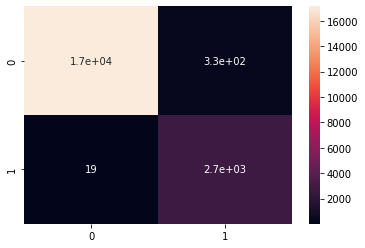

In [22]:
# evaluate model
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

In [23]:
# predict test samples
submission = model.predict(test_df)
submission = pd.DataFrame(submission, columns=['Cancel'])
submission


,Cancel
0,0
1,0
2,0
3,1
4,0
...,...
43288,0
43289,0
43290,0
43291,0
